In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

users = ['A','B','C','D','E']
movies = ['Titanic', 'Rocky', 'The Hobbit', 'Fight Club', 'Jurassic Park']
matrix = [[0.82,0.18,0.5,0.1,0.26],
          [0.74,0.26,0.5,0.2,0.32],
          [0.34,0.69,0.5,0.7,0.62],
          [0.58,0.42,0.5,0.4,0.44],
          [0.1,0.9,0.5,1,0.8]]

users_movies = pd.DataFrame(data=matrix, index=users, columns=movies)
users_movies.T

,A,B,C,D,E
Titanic,0.82,0.74,0.34,0.58,0.1
Rocky,0.18,0.26,0.69,0.42,0.9
The Hobbit,0.50,0.50,0.50,0.50,0.5
Fight Club,0.10,0.20,0.70,0.40,1.0
Jurassic Park,0.26,0.32,0.62,0.44,0.8


(a) Calcule o fatora ̧c ̃ao aproximada (SVD) com 2 componentes para a
transposta dessa matriz (Filmes por usuários).

In [29]:
A = users_movies.T
	
u, s, v = np.linalg.svd(A, full_matrices=False)

u_2 = u[:, :2]
s_2 = s[:2]
v_2 = v[:2, :]

A_rank2 = u_2 @ np.diag(s_2) @ v_2
u_2

array([[-0.38390894,  0.80118101],
       [-0.4765479 , -0.29534221],
       [-0.42721258,  0.25551505],
       [-0.48134213, -0.4265674 ],
       [-0.45969031, -0.15373442]])

(b) Desenhe os filmes em dimens ̃ao dois (pode ser na m ̃ao ou em Python
ou Julia) baseado no resultado da quest ̃ao anterior.

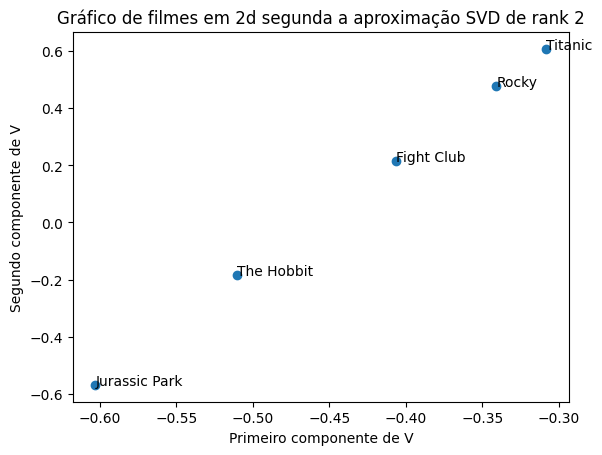

In [23]:
fig, ax = plt.subplots()
ax.scatter(v_2[0, :], v_2[1, :])

for i, name in enumerate(movies):
    ax.annotate(name, (v_2[0, i], v_2[1, i]))

ax.set_xlabel('Primeiro componente de V')
ax.set_ylabel('Segundo componente de V')
ax.set_title('Gráfico de filmes em 2d segunda a aproximação SVD de rank 2')

plt.show()

A matriz V contém os vetores singulares direitos da matriz original, que representam como os filmes se relacionam com as componentes latentes. Portanto, podemos usar a matriz V transposta para representar cada filme em termos dos dois componentes latentes principais identificados pela SVD.

Assim, filmes que estão próximos um do outro no gráfico têm perfis de avaliação semelhantes, haja vista que a componente latente é uma variável não observável que pode explicar padrões de comportamento em um conjunto de dados, enquanto filmes que estão distantes um do outro têm perfis de avaliação diferentes. Essa visualização pode ser útil para identificar grupos de filmes similares e sugerir novos filmes aos usuários com base em seus gostos por filmes semelhantes.

Se alguém gostou de Titanic, recomenda-se Rocky.